## Functions, lists, and dictionaries

In this notebook we discuss a few Python programming concepts that are useful for data analysis. If you've been working through the NHANES example notebooks, you will have seen these in-use already. There is a lot to say about these new concepts, but we will only be giving a brief introduction to each here. For more information, follow the provided links.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Functions

If you use a block of code multiple times, it is best practice to put that code into a function instead of copying and pasting it into multiple places in your program script. This reflects the "DRY" (do not repeat yourself) principal, and also encapsulates the inner workings of the function from the rest of your program script.  In some cases, doing this can prevent errors that may result from name collisions or side effects between variables inside the function and global variables with the same name.

For example, suppose you want to generate a certain type of plot repeatedly with multiple different data sets. You can create a function that generates the plot for any input data, then you can call the function as many times as needed.

In Python, indentation is very important. If done incorrectly, your code will yield incorrect results or produce an error. When defining a function, all code after the ':' must be indented properly. The indentation conveys the scope of the function's code.

```
def function_name(arguments):
    """
    Header comment: brief description of what this function does
    
    Args:
        obj: input for this function
    Returns:
        out: the output of this function
    """
    
    some code
    
    return out 
 ```
 
Exactly how to structure the header comments is up to you if you work alone, or will likely be specified if working for an established organization. 
 
Function names should start with a lower case letter (they cannot start with a number), and can be in camelCase or snake_case.

If your function returns a value, you use 'return' to specify what value is returned. A function doesn't always have to return something though. For example, you could have a function that creates a plot and then saves it to a file in the current directory. This is called a "side effect", i.e. something that the function does that does not involve returning a value to the caller.

Below are some examples of simple functions:

In [2]:
def sum_x_y(x, y): # don't need comments if immediately clear what the function does
    out = x + y
    return out

sum_x_y(4, 6)

10

In [3]:
def get_max(x):
    current_max = x[0]
    for i in x[1:]:
        if i > current_max:
            current_max = i
    return current_max

In [4]:
get_max(np.random.choice(400, 100)) 
# np.random.choice(400, 100) will randomly choose 100 integers between 0 and 400       

398

Below is an example of a function that generates a plot.  We can then easily generate plots of the same type by calling this function on various datasets.

In [5]:
def make_plot(x):
    g = sns.histplot(x, kde=True, color="green")

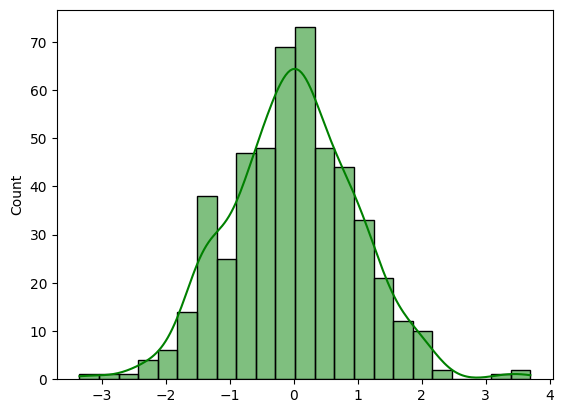

In [6]:
make_plot(np.random.normal(size=500))

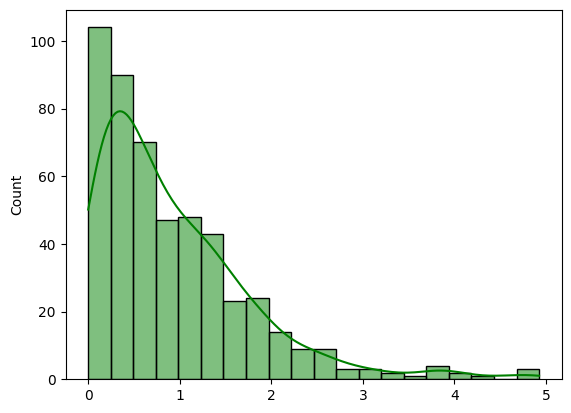

In [7]:
make_plot(np.random.exponential(size=500))

There is a lot more to be said about functions that we don't have time to cover in this course, so we leave you with examples of [common gotchas](https://docs.python-guide.org/writing/gotchas/) that you may run into.

### lambda functions

Sometimes it is useful to create an "anonymous function", usually to pass to another function as an argument.  The term "lambda function" has been used in this context in many languages, originating with Lisp.  A lambda function can have any number of arguments but only one expression that when evaluated produces the result. Lambda functions, unlike defined functions, always return a variable.

The format of a lambda function is  

```
lambda arguments: expression  
```

Lambda functions can look similar to a mathematical expression for evaluating a function.  
For example:

```
(lambda x: x**2)(3)
```

Is the same as mathmatically writing $f(x) = x^2$ an then evauluating the function $f$ at $x=3$,  
$f(3) = 9$

In [8]:
(lambda x: x**2)(3)

9

Another way to use a lambda function is to store it in a variable like in the example below.

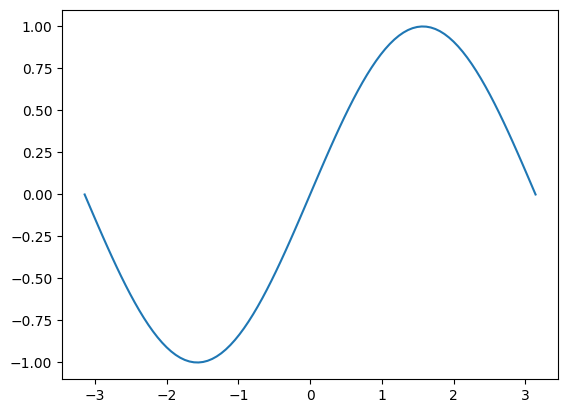

In [9]:
f = lambda x: np.sin(x)
x = np.linspace(-np.pi, np.pi, 100)
y = [f(i) for i in x]
plt.plot(x, y)
# we could have made this several ways, can you think of another?

You shouldn't come across many situations where you would have to use a lambda function, but we present them briefly here so that you can recognize them in the wild. 

### Reading help documentation
A key skill in being a successful programmer is being able to read the documentation for a function and understand what that functions does and what the arguments are. 

To get the documentation, use the help function. First, let's call the help function on help, to see what is does:

In [10]:
help(help)

Help on _Helper in module _sitebuiltins object:

class _Helper(builtins.object)
 |  Define the builtin 'help'.
 |  
 |  This is a wrapper around pydoc.help that provides a helpful message
 |  when 'help' is typed at the Python interactive prompt.
 |  
 |  Calling help() at the Python prompt starts an interactive help session.
 |  Calling help(thing) prints help for the python object 'thing'.
 |  
 |  Methods defined here:
 |  
 |  __call__(self, *args, **kwds)
 |      Call self as a function.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



We can see that calling help(thing) will print the documentation for 'thing'. Generally, this documentation will first list the function with its arguments (also called parameters), showing what the default arguments are. Then, it will list these arguments (parameters) and specify what they are and their type. Then it will documents what the function returns, errors it may raise, and possibly other documentation as necessary. Often, the bottom of the document will contain examples.

Let's look at another example, the pandas drop function. This is used to drop rows or columns from a DataFrame. If you had a DataFrame call 'my_df', you would call this function by
```
my_df.drop(some arguments)
```
Unfortunately, we cannot simply call 
```
help(drop)
```
because drop is not a function in base python. Instead, we must call
```
help(pd.DataFrame.drop)
```
because we need to specify that this is from pandas library (pd) and is applied to a DataFrame. If you're wondering why I'm capitalizing DataFrame as such, it is because that is a data type in the python pandas library. Without the capitalization, it had no meaning. 

In [11]:
help(pd.DataFrame.drop)

Help on function drop in module pandas.core.frame:

drop(self, labels: 'IndexLabel' = None, *, axis: 'Axis' = 0, index: 'IndexLabel' = None, columns: 'IndexLabel' = None, level: 'Level' = None, inplace: 'bool' = False, errors: 'IgnoreRaise' = 'raise') -> 'DataFrame | None'
    Drop specified labels from rows or columns.
    
    Remove rows or columns by specifying label names and corresponding
    axis, or by specifying directly index or column names. When using a
    multi-index, labels on different levels can be removed by specifying
    the level. See the `user guide <advanced.shown_levels>`
    for more information about the now unused levels.
    
    Parameters
    ----------
    labels : single label or list-like
        Index or column labels to drop. A tuple will be used as a single
        label and not treated as a list-like.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Whether to drop labels from the index (0 or 'index') or
        columns (1 or 'columns').

If you wanted to drop the column 'this one' from the DataFrame 'my_df', how would you do it?

## Base Python lists

A list in Python is a data structure built into the base language.  It is flexible and always available, but not especially performant.  You will rarely want to use Python lists to hold data that you are analyzing, but Python lists are frequently useful to hold smaller collections of objects that you are manipulating programatically.

Lists can have multiple datatypes. For example one element can be a string and another can be an int and another a float. Lists are defined by using the square brackets: \[ \], with elements separated by commas, ',' e.g.
```
my_list = [1, 'Colorado', 4.7, 'rain']
```
Lists are indexed by position. Remember, in Python, the index starts at 0 and ends at `len(list)-1`. So to retrieve the first element of the list you use:
```
my_list[0]
```

Numpy arrays (ndarrays) differ from lists in that all values that they contain have the same datatype. For example all the elements might be ints or strings or floats or objects. A literal ndarray can be constructed using `np.asarray(object)`, where the input 'object' can be for example a list or a tuple, e.g.    

```
my_array = np.asrray([1, 4, 5, 2])
```
or 
```
my_array = np.asarray((1, 4, 5, 2))
```

Lists and numpy arrays differ in their speed and memory efficiency. An intuitive reason for this is that Python lists have to store the value of each element and also the type of each element (since the types can differ), whereas numpy arrays only need to store the type once because it is the same for all the elements in the array. 

You can do calculations with numpy arrays that can't be done on lists, e.g. 

```
my_array / 3
```

will return a numpy array, with each of the elements divided by 3. On the other hand,

```
my_list / 3
```

will throw an error.

You can append items to the ends of lists and numpy arrays, although the syntax for doing this differs. Appending to Python lists is a reasonably efficient operation but appending to ndarrays is not. It is best to avoid appending to ndarrays wherever possible.

```
my_list.append('new item')
np.append(my_array, 5) # new element must be of the same type as all other elements
```

Links to relevant Python docs: [lists](https://docs.python.org/3/tutorial/datastructures.html), [numpy arrays](https://numpy.org/doc/stable/user/basics.creation.html), [more on numpy arrays](https://numpy.org/doc/stable/reference/generated/numpy.array.html)

In [12]:
python_list = [1, 2, 3]
numpy_array = np.asarray([1, 2, 3])

Index by position:

In [13]:
python_list[0]

1

In [14]:
numpy_array[0]

1

Vectorized arithmetic (does not work for python_list):

In [15]:
numpy_array / 3

array([0.33333333, 0.66666667, 1.        ])

In [16]:
python_list.append(5) # inplace
python_list

[1, 2, 3, 5]

In [17]:
numpy_array = np.append(numpy_array, 5) # cannot do inplace because not always contiguous memory
numpy_array

array([1, 2, 3, 5])

## Dictionaries  

Dictionaries (sometimes called "associative arrays", "maps", "hash tables", or "key/value stores") are a data structure that stores key-values pairs.  The keys must be distinct and the main use-case is to retrieve the value based on its key. 
In Python, the values can have any type and the keys can have almost any type.

We will introduce dictionaries here.  To learn more about dictionaries you might start [here](https://docs.python.org/3/tutorial/datastructures.html) in section 5.5.

A literal dictionary in Python is expressed \{key1: value1, key2: value2\}.  The next cell creates a small literal dictionary and retrieves the value associated with key 'thing 1'.

In [18]:
dct = {'thing 1': 2, 'thing 2': 1}
dct['thing 1']

2

Keys can be inserted into a dictionary as follows:

In [19]:
dct['new thing'] = 'woooo'
dct['new thing']

'woooo'

Below is a more useful example that matches the names of US states beginning with "A" to their postal abbreviation:

In [20]:
states = {"Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR"}

Dictionaries have many uses when manipulating dataframes.  For example, here we create a dataframe from a dictionary that maps column names to columns of data:

In [21]:
df = pd.DataFrame({'col1':range(3), 'col2':range(3,6)})
df

,col1,col2
0,0,3
1,1,4
2,2,5


Here we use a dictionary to rename the columns of a dataframe.

In [22]:
df.rename(columns={'col1': 'apples', 'col2':'oranges'})

,apples,oranges
0,0,3
1,1,4
2,2,5
